In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [2]:
# 读取数据
def load_data(file_path):
    return pd.read_csv(file_path)

In [3]:
# 加载所有训练数据
files = ['经济train.csv', '军事train.csv', '科技train.csv', '社会train.csv', '体育train.csv', '文化train.csv', '政治train.csv']
train_data = pd.concat([load_data(file) for file in files])

In [4]:
# 数据预处理
train_data['Content'] = train_data['Content'].fillna('')  # 填充空内容
train_data['Area'] = train_data['Area'].apply(lambda x: x.strip())  # 去掉 Area 列中的空格

In [5]:
# 特征提取
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(train_data['Content'])

In [6]:
# 标签编码
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_data['Area'])

In [7]:
# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 模型训练
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [9]:
# 预测
y_pred = model.predict(X_test)

In [10]:
# 模型评估
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [11]:
# 打印评估指标
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8439
Precision: 0.8495
Recall: 0.8439
F1 Score: 0.8423


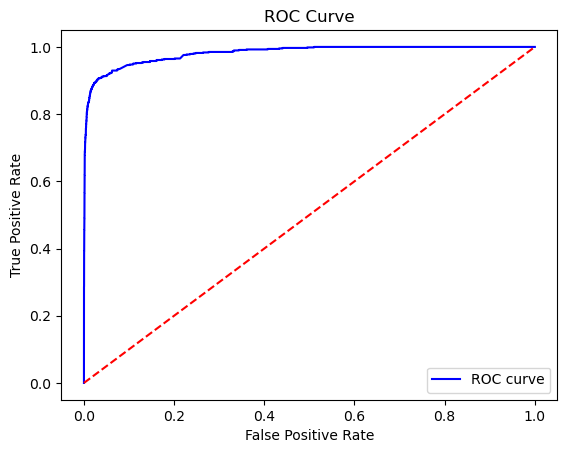

In [12]:
# ROC曲线
y_prob = model.predict_proba(X_test)  # 获取预测概率
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()